In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./data/workingData')

display(df)



,Unnamed: 0,country,Year,co2_including_luc,Cereal,Citrus Fruits,Fibre,Fruit,Vegetables,Sugar Crops,"Oilcrops, Cake","Oilcrops, Oil",Pulses,Roots and Tubers,Treenuts
0,0,Spain,1961,71.444,7501313.0,1963100.0,125501.00,8056170.0,5135084.0,4668000.0,123085.00,454410.81,705227.0,5033925.0,337261.0
1,1,Spain,1962,70.795,9274378.0,1411000.0,135918.00,7842627.0,5088416.0,3843000.0,131119.00,408366.28,755270.0,4263018.0,237906.0
2,2,Spain,1963,60.300,9418967.0,2087300.0,113091.00,9093705.0,5315694.0,3048000.0,112455.00,728444.63,750300.0,5184266.0,269686.0
3,3,Spain,1964,67.304,8306768.0,1915200.0,85473.00,10275272.0,5417800.0,3670000.0,94265.00,163003.84,625320.0,4342199.0,274529.0
4,4,Spain,1965,62.890,8872202.0,2021300.0,89752.00,9368335.0,5263390.0,4099000.0,100359.00,402577.22,529389.0,4146900.0,279338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,Spain,2018,249.668,25348920.0,6778000.0,65308.19,20000020.0,12455120.0,2870910.0,570304.00,1910949.59,690650.0,2010930.0,555290.0
58,58,Spain,2019,231.262,20589030.0,6010040.0,68188.90,18317650.0,13259340.0,2752710.0,563230.00,1787917.14,403010.0,2259320.0,572410.0
59,59,Spain,2020,193.952,27320900.0,6696400.0,65974.68,19471070.0,12668790.0,2432840.0,557147.60,1852783.23,571680.0,2051830.0,642560.0
60,60,Spain,2021,210.310,25510560.0,6711940.0,65631.42,19031150.0,13535730.0,2506290.0,563575.92,1881779.99,444560.0,2081110.0,596290.0


MSE = 1834.7589675181894
MAE = 33.68383192962836
R-squared = 0.6404335376159729


Text(0, 0.5, 'Co2 (millions of tons)')

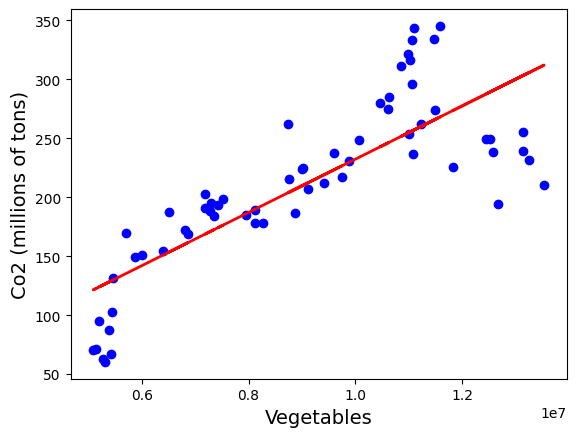

In [6]:


X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)


linModel = LinearRegression()
linModel.fit(X,y)
y_pred = linModel.predict(X)

print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))



plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1243.9105018745656
MAE = 30.472561501616806
R-squared = 0.4794372632136844


Text(0, 0.5, 'Co2 (millions of tons)')

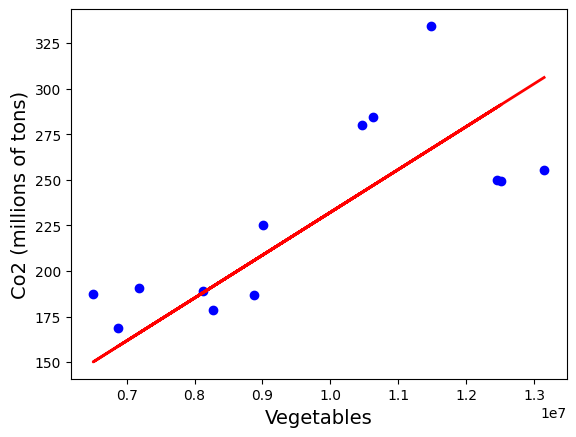

In [7]:

test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1027.4100003795502
MAE = 25.237956112214952
R-squared = 0.7986535638770305
k = 10:  3082.1445523991424
LOOCV:  2251.459667520868


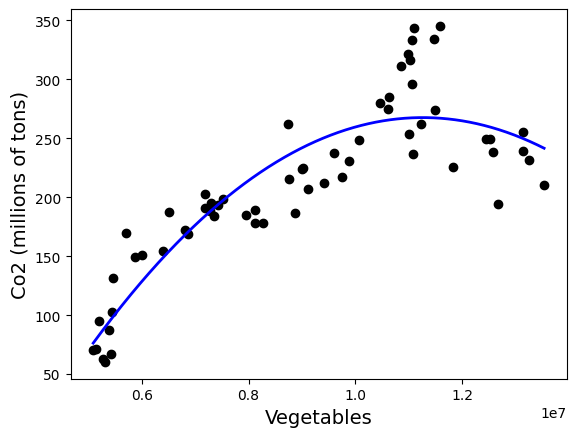

In [8]:
# test_p = .2
# seed = 123

# X = df[['Vegetables']].values.reshape(-1, 1)
# y = df[['co2_including_luc']].values.reshape(-1,1)

# polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
# xPoly = polyFeatures.fit_transform(X)
# polyModel = LinearRegression()
# polyModel.fit(xPoly, y)

# plt.scatter(X, y, color='black')
# xDelta = np.linspace(X.min(), X.max(), 1000)
# yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
# plt.plot(xDelta, yDelta, color='blue', linewidth=2)
# plt.xlabel('Vegetables', fontsize=14)
# plt.ylabel('Co2 (millions of tons)', fontsize=14)


# print('MSE =', mean_squared_error(y, y_pred))
# print('MAE =', mean_absolute_error(y, y_pred))
# print('R-squared =', r2_score(y, y_pred))


test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)




# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y)
y_pred = polyModel.predict(xPoly)



plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))
ten_fold_scores = -cross_val_score(
    polyModel, X, y, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, X, y, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))





MSE = 1008.2934424604921
MAE = 24.57515785037134
R-squared = 0.5780403870696982


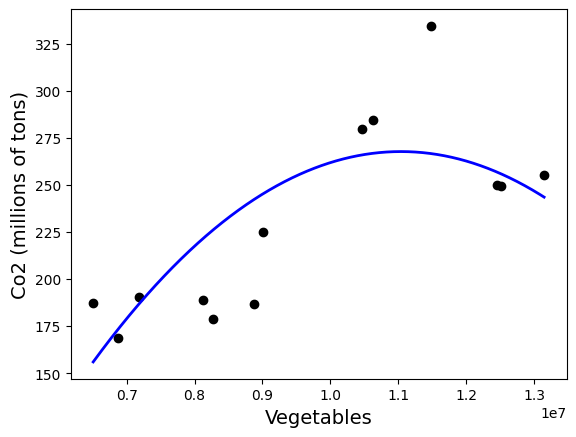

In [9]:
# TRY CHANGING TO DEGREE 3, MUCH BETTER PERFORMANCE
# TODO: use one-standard error method to determine which degree to use (see Zybooks 8.8)
test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)



plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))


MSE = 1642.971673339624
MAE = 33.03484441401907
R-squared = 0.6780190080340691


Text(0, 0.5, 'Co2 (millions of tons)')

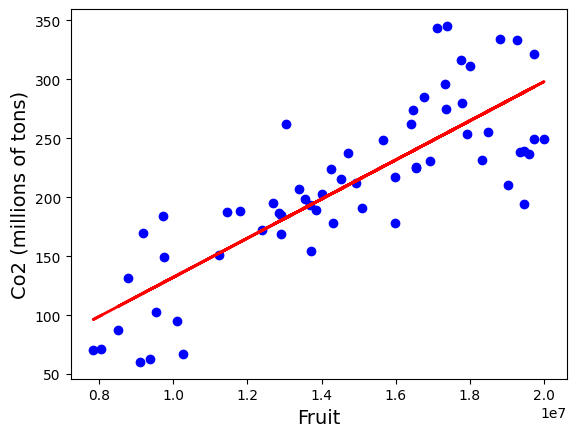

In [10]:


test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

# X_train, X_test, y_train, y_test = train_test_split(

#     X, y, test_size=test_p, random_state=seed
# )

linModel = LinearRegression()
linModel.fit(X,y)
# linModel.fit(X_train,y_train)
# y_pred = linModel.predict(X_test)
y_pred = linModel.predict(X)


print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))


plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1188.2469498447635
MAE = 29.885173748160902
R-squared = 0.5027318418350676


Text(0, 0.5, 'Co2 (millions of tons)')

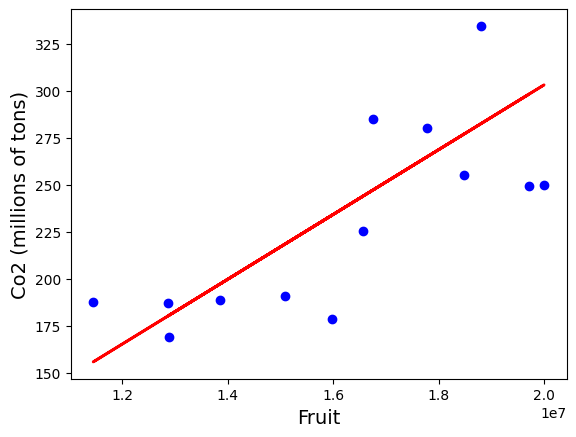

In [11]:

test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)
# not sure exactly what I am doing here
# test_p = .2
# seed = 123

# X = df[['Vegetables']].values.reshape(-1, 1)
# y = df[['co2_including_luc']].values.reshape(-1,1)

# X_train, X_test, y_train, y_test = train_test_split(

#     X, y, test_size=test_p, random_state=seed
# )

# polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
# xPoly = polyFeatures.fit_transform(X_train)
# polyModel = LinearRegression()
# polyModel.fit(xPoly, y_train)

# plt.scatter(X_test, y_test, color='black')
# xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
# yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
# plt.plot(xDelta, yDelta, color='blue', linewidth=2)
# plt.xlabel('Vegetables', fontsize=14)
# plt.ylabel('Co2 (millions of tons)', fontsize=14)



# print('MSE =', mean_squared_error(y_test, y_pred))
# print('MAE =', mean_absolute_error(y_test, y_pred))
# print('R-squared =', r2_score(y_test, y_pred))




MSE = 1642.971673339624
MAE = 33.03484441401907
R-squared = 0.6780190080340691
k = 10:  2388.9668537292987
LOOCV:  1952.9829695250535


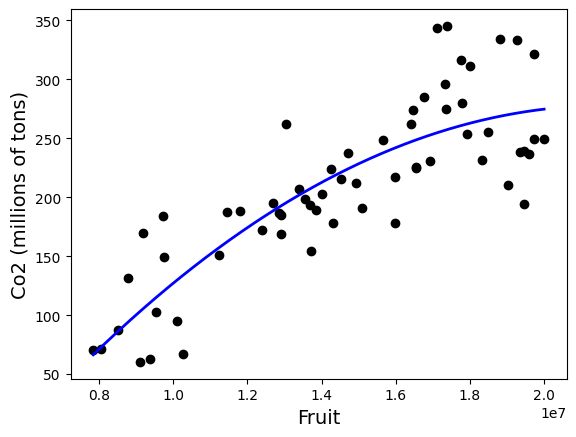

In [12]:

from sklearn.model_selection import cross_val_score


test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

# X2 = X[:, 1].reshape(-1, 1)
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

# X_train, X_test, y_train, y_test = train_test_split(

#     X, y, test_size=test_p, random_state=seed
# )

linModel = LinearRegression()
# linModel.fit(X_train,y_train)
# y_pred = linModel.predict(X_test)
linModel.fit(X,y)
y_pred = linModel.predict(X)

# print('MSE =', mean_squared_error(y_test, y_pred))
# print('MAE =', mean_absolute_error(y_test, y_pred))
# print('R-squared =', r2_score(y_test, y_pred))
print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))
ten_fold_scores = -cross_val_score(
    polyModel, X, y, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(polyModel, X, y, scoring='neg_mean_squared_error', cv=49)
print('k = 10: ', np.mean(ten_fold_scores))
print('LOOCV: ', np.mean(LOOCV_scores))



# plt.scatter(X, y, color='blue')
# plt.plot(X, y_pred, color='red', linewidth=2)
# plt.xlabel('Vegetables', fontsize=14)
# plt.ylabel('Co2 (millions of tons)', fontsize=14)

MSE = 1207.634046828239
MAE = 30.207598294637386
R-squared = 0.4946185569573768


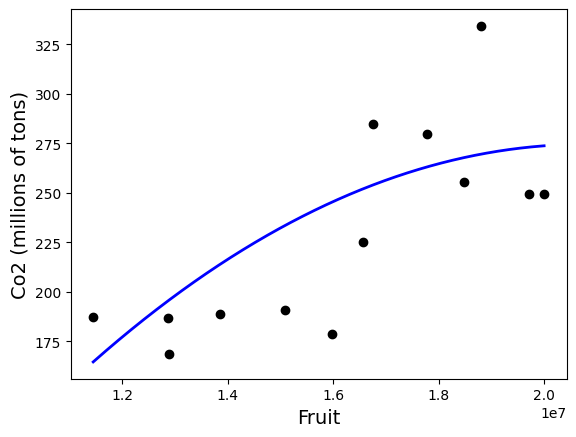

In [13]:

test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)



plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

In [14]:
# Multiple linear regressionraw
X = df[['Vegetables', 'Fruit']].values.reshape(-1, 2)
y = df[['co2_including_luc']].values.reshape(-1,1)


linModel = LinearRegression()
linModel.fit(X,y)
y_pred = linModel.predict(X)

print('MSE =', mean_squared_error(y, y_pred))
print('MAE =', mean_absolute_error(y, y_pred))
print('R-squared =', r2_score(y, y_pred))




MSE = 1608.653781545829
MAE = 32.55138657089282
R-squared = 0.6847444489051737
